In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family = 'Malgun Gothic')
df_H = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_H.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744 entries, 0 to 1743
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0.2            1744 non-null   int64  
 1   Unnamed: 0.1            1744 non-null   int64  
 2   Unnamed: 0              1744 non-null   int64  
 3   환자ID                    1744 non-null   object 
 4   Large Lymphocyte        1744 non-null   float64
 5   Location of herniation  1744 non-null   int64  
 6   가족력                     1744 non-null   float64
 7   간질성폐질환                  1744 non-null   int64  
 8   고혈압여부                   1744 non-null   int64  
 9   과거수술횟수                  1744 non-null   int64  
 10  당뇨여부                    1744 non-null   int64  
 11  말초동맥질환여부                1744 non-null   int64  
 12  빈혈여부                    1744 non-null   int64  
 13  성별                      1744 non-null   int64  
 14  스테로이드치료                 1744 non-null   

## 상관 관계 확인
- 목표변수: '입원기간' - 분포 언밸런스 (연속형은 정규화 확인, 범주형은 언밸런스 확인)
- 설명변수: '당뇨여부', '스테로이드치료', '신부전여부', '심혈관질환', '암발병여부'

#### 1. 당뇨와 입원기간

In [144]:
df_Diabetes = df_H[['당뇨여부', '입원기간', '입원일자', '퇴원일자']]
df_Diabetes

,당뇨여부,입원기간,입원일자,퇴원일자
0,0,2,20190713,20190716
1,0,1,20190715,20190716
2,0,1,20190729,20190801
3,0,1,20190731,20190803
4,0,2,20190903,20190907
...,...,...,...,...
1739,0,12,20170302,20170313
1740,0,2,20170316,20170317
1741,0,3,20170928,20170930
1742,0,3,20170604,20170606


#### 1. 당뇨여부

In [145]:
# 이상치 제거
df_Da = df_Diabetes['입원기간'].describe()['25%']
df_Db = df_Diabetes['입원기간'].describe()['75%']
df_Da_IQR = df_Db - df_Da

In [146]:
df_Da, df_Db, df_Da_IQR

(1.0, 2.0, 1.0)

In [147]:
df_Da_up = df_Db + 1.5 * df_Da_IQR
df_Da_down = df_Da - 1.5 * df_Da_IQR

In [148]:
df_Da_up, df_Da_down

(3.5, -0.5)

In [149]:
df_D_condition = (df_Diabetes['입원기간'] <= df_Da_up) & (df_Diabetes['입원기간'] >= df_Da_down)
df_H = df_H[df_D_condition]
df_Diabetes = df_Diabetes[df_D_condition]

In [150]:
df_Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 0 to 1743
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   당뇨여부    1684 non-null   int64
 1   입원기간    1684 non-null   int64
 2   입원일자    1684 non-null   int64
 3   퇴원일자    1684 non-null   int64
dtypes: int64(4)
memory usage: 65.8 KB


In [151]:
df_Diabetes.pivot_table(index='당뇨여부', values='입원기간', aggfunc=np.mean)

,입원기간
당뇨여부,
0,1.450980
1,1.495146


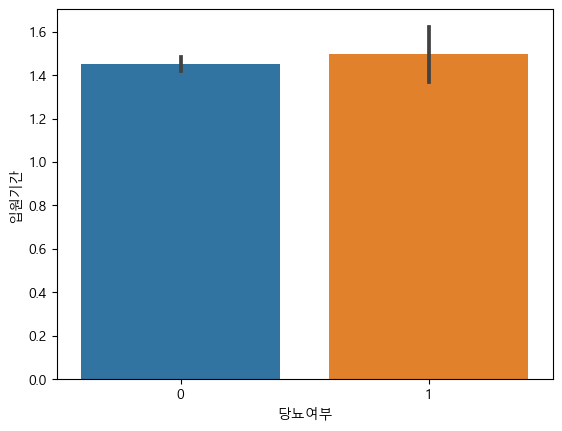

In [152]:
df_Diabetes_chart = sns.barplot(data=df_Diabetes, x='당뇨여부', y='입원기간')

##### 따라서, 당뇨 환자의 평균 입원기간이 조금 더 길었음을 확인하였다.

#### 2. 스테로이드치료

In [157]:
df_Ste = df_H[['입원기간', '스테로이드치료']]
df_Ste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 0 to 1743
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   입원기간     1684 non-null   int64
 1   스테로이드치료  1684 non-null   int64
dtypes: int64(2)
memory usage: 39.5 KB


In [154]:
df_Ste.pivot_table(index='스테로이드치료', values='입원기간', aggfunc=np.mean)

,입원기간
스테로이드치료,
0,1.415066
1,1.479643


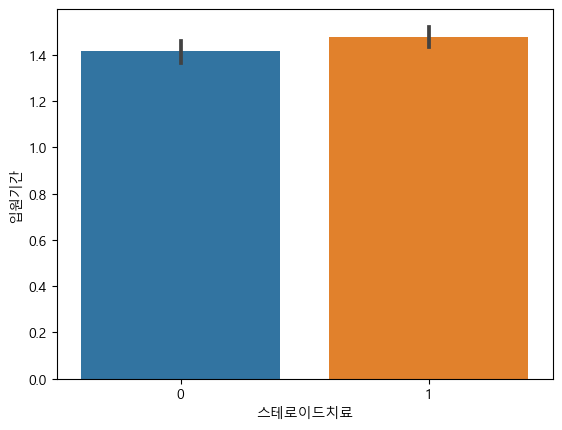

In [155]:
df_Ste_chart = sns.barplot(data=df_Ste, x='스테로이드치료', y='입원기간')

##### 따라서, 스테로이드치료를 받은 환자의 평균 입원기간이 조금 더 길었음을 확인하였다.

#### 3. 신부전여부

In [160]:
df_Ki = df_H[['신부전여부', '입원기간']]
df_Ki

,신부전여부,입원기간
0,0,2
1,0,1
2,0,1
3,0,1
4,0,2
...,...,...
1738,0,2
1740,0,2
1741,0,3
1742,0,3


In [161]:
df_Ki.pivot_table(index='신부전여부', values='입원기간', aggfunc=np.mean)

,입원기간
신부전여부,
0,1.455210
1,1.395349


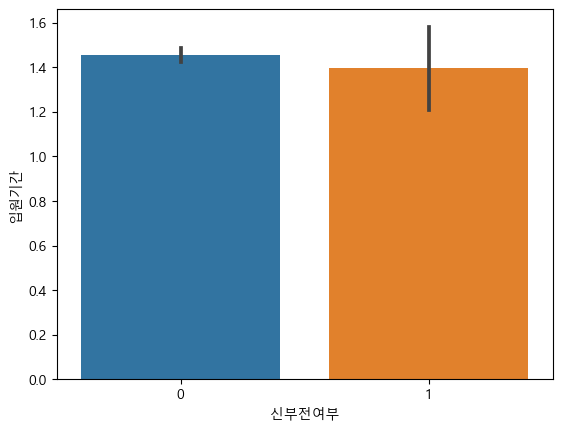

In [162]:
df_Ki_chart = sns.barplot(data=df_Ki, x='신부전여부', y='입원기간')

##### 신부전을 앓는 환자의 입원기간이 상대적으로 더 짧았았다.